<br>
<font size="6">
    <br>
    <center> Interactive visualization of scientific data with Plotly </center>
    <br>
    <center> Prof. Núria López group seminar </center>
    <br>
    <center> Julian Geiger </center>
    <br>
    <center> 20.04.2021 </center>
    <br>
    <br>
</font>
<hr style="border:2px solid black"> </hr>

<h1> 1. Introduction </h1>

<font size="4">
<ul>
    <li> Python API built on top of Plotly Javascript library. <br> Installation: <code> pip install plotly / conda install -c plotly plotly </code>
    </li>
    <br>
    <li> Plots interactive by default </li>
    <br>
    <li> Extensive customization capabilities </li>    
    <br>
    <li> Intuitive and consistent (focus on <code>graph_objects</code> in this seminar)  </li>
</ul>
</font>

<font size="4">  </font>

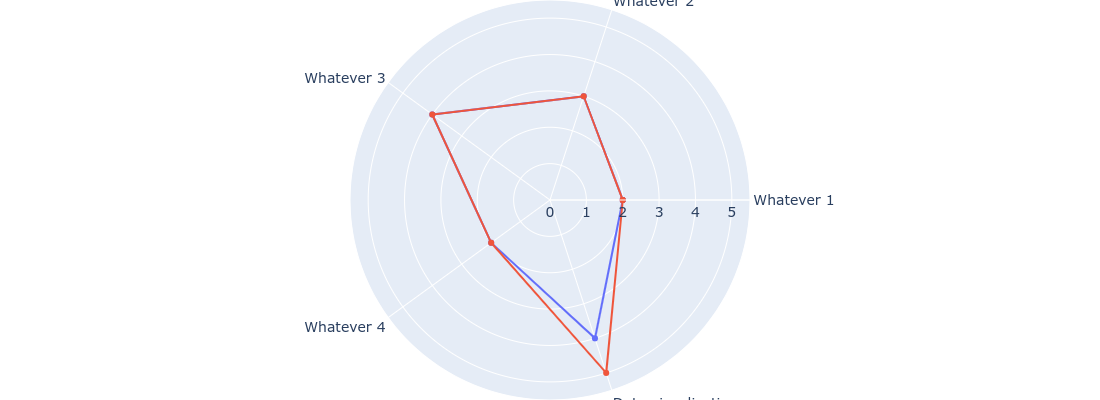

In [1]:
import plotly.graph_objects as go
categories = ['processing cost','mechanical properties','chemical stability',
              'thermal stability', 'device integration']

categories = ['Whatever {}'.format(i) for i in range(1, 5)] + ['Data visualization']+["Whatever 1"]

scores = [2, 3, 4, 2, 4]
fig = go.Figure()

_ = fig.add_trace(go.Scatterpolar(
      r=scores+[2],
      theta=categories,
      name='Before this seminar',
      hoverinfo='r+name',
))
_ = fig.add_trace(go.Scatterpolar(
    r=scores[:-1]+[5]+[2],
    theta=categories,
    name='After this seminar',
    hoverinfo='r+name',
))

_ = fig.update_layout(
    width=400, height=400, font_size=14,
        polar=dict(radialaxis=dict(visible=True, range=[0, 5.5]),),
        margin=dict(l=100,r=100,b=0,t=0),
        showlegend=False,
        hoverlabel = dict(font=dict(size=16), namelength = -1),
)

fig.show()

<hr style="border:2px solid black"> </hr>
<h1> 2. Creating and customizing plots </h1>

In [2]:
# Relevant imports
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Some sklearn imports for statistical methods
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso

# Some jupyter-notebook related imports/settings
from plotly.offline import init_notebook_mode, plot
from IPython import display
from IPython.display import IFrame
from IPython.core.interactiveshell import InteractiveShell
init_notebook_mode(connected=False)
InteractiveShell.ast_node_interactivity = "all"

<hr style="border:2px solid black"> </hr>
<h2> 2.1 Empty canvas: <code>go.Figure()</code> </h2>

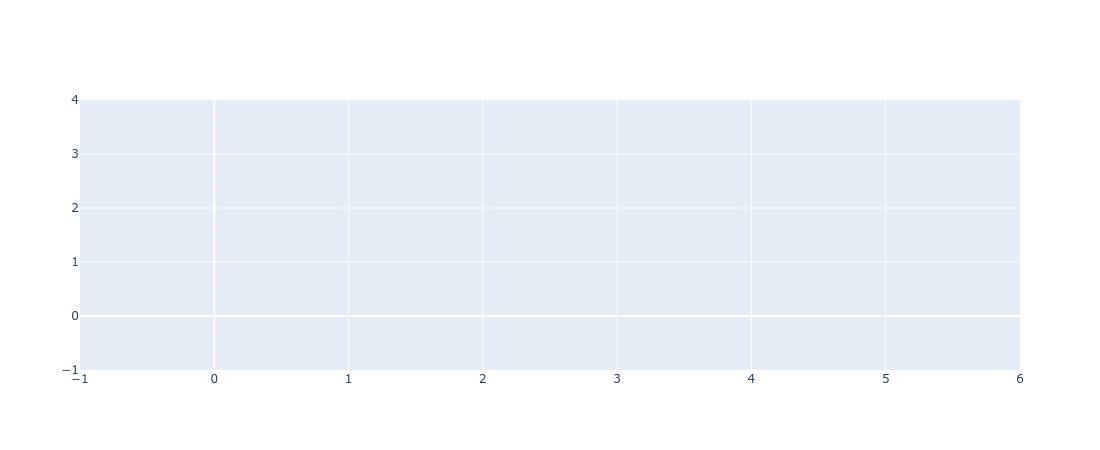

In [3]:
empty_fig = go.Figure()
empty_fig.show()

<hr style="border:2px solid black"> </hr>
<h2> 2.2 Simple scatter plot with <code>add_trace()</code> and <code>go.Scatter()</code> </h2>

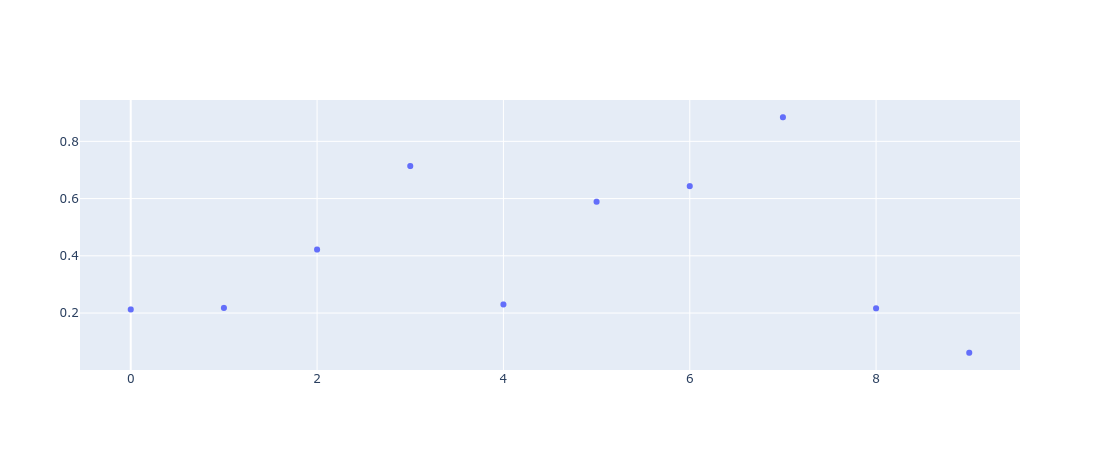

In [4]:
# Create random sample data
scatter_data = np.random.rand(10)

# Create figure
scatter_fig = go.Figure()

# Add scatter-plot
# Assignment to _ variable similar to redirection to /dev/null in bash. Avoids output of return value.
_ = scatter_fig.add_trace(
        go.Scatter(
            y=scatter_data,
    #       x=list(range(len(scatter_data))),
            mode='markers',
        )
    )

# Show figure
_ = scatter_fig.show()

<hr style="border:2px solid black"> </hr>
<h2> 2.3 Simple line plot with <code>add_trace()</code> and <code>go.Scatter()</code> </h2>

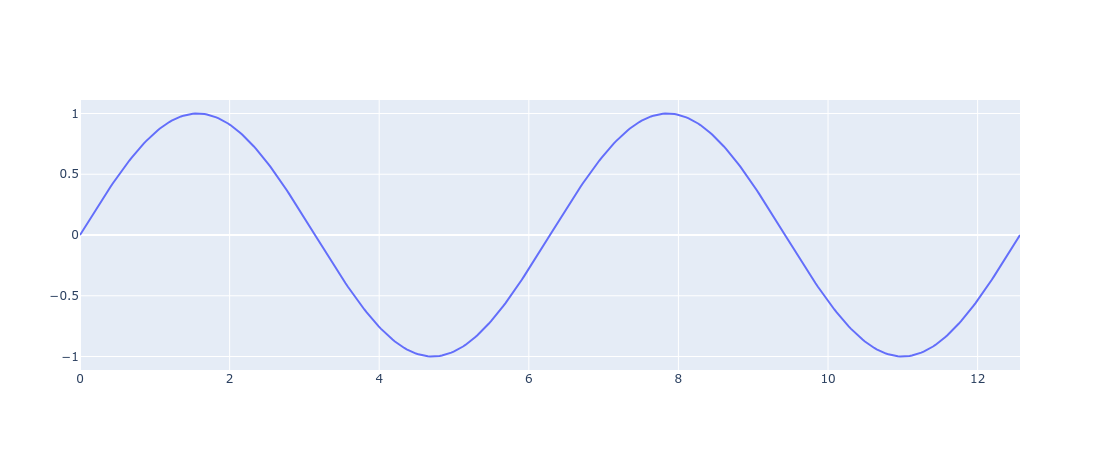

In [5]:
# Let's create our data
x = np.arange(0, 4*np.pi+np.pi/100, np.pi/100)
y = np.sin(x)

# Create figure
sine_fig = go.Figure()

# Add scatter-plot
_ = sine_fig.add_trace(
    go.Scatter(
        x=x,
        y=y,
        mode='lines',
    )
)

# Show figure
_ = sine_fig.show()

<hr style="border:2px solid black"> </hr>
<h2> 2.4 Figure customization with <code>go.Layout()</code> and <code>update_layout()</code> </h2>

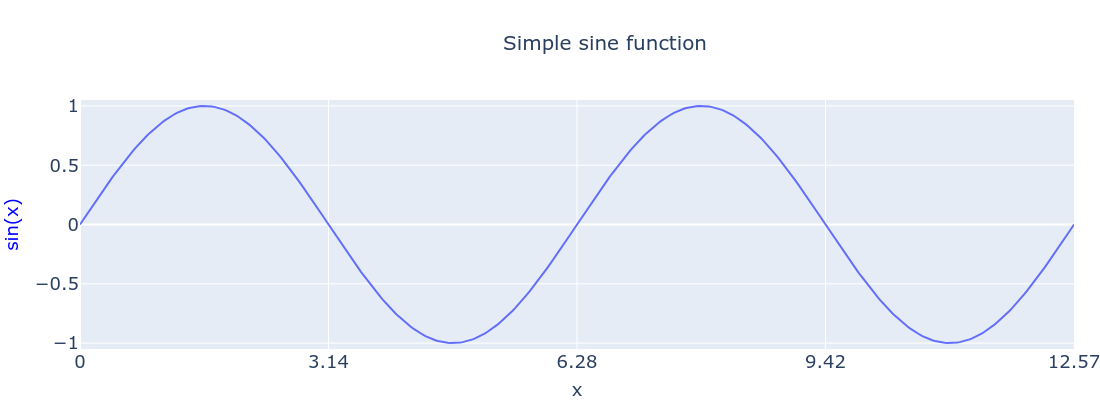

In [6]:
# Define figure layout
sine_layout = go.Layout(
    
    width=800, height=400,
    title=dict(text='Simple sine function', x=0.55,
               font_size=20,                                 # Magic underscore notation
              ),
#   title_text='Simple sine function',

#   margin=go.layout.Margin(l=80, r=0, b=0, t=50,),          # Access through go.layout subclasses
    margin=dict(l=80, r=0, b=50, t=100,),

    xaxis=dict(
        title='x', title_font=dict(size=18,),
        tickfont=dict(size=18,), 
        tickmode='linear', tick0=0, dtick=np.pi,
#         gridcolor='black',
    ),
)

# Apply layout to figure
_ = sine_fig.update_layout(sine_layout)

# Apply layout-update to certain axes only
_ = sine_fig.update_yaxes(title=dict(text='sin(x)', font_size=18, font_color='blue'),
        range=[-1.05, 1.05],
        tickmode='linear', tick0=0, dtick=0.5, tickfont=dict(size=18,),
#         gridcolor='black', zerolinecolor='black'
    )

# Show figure
_ = sine_fig.show()

<hr style="border:2px solid black"> </hr>
<h2> 2.5 Simple bar chart with <code>go.Bar()</code> </h2>

In [7]:
# Load data
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

wine_df.head()
print("Shape of wine-dataframe: {}".format(wine_df.shape))

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

Shape of wine-dataframe: (178, 13)


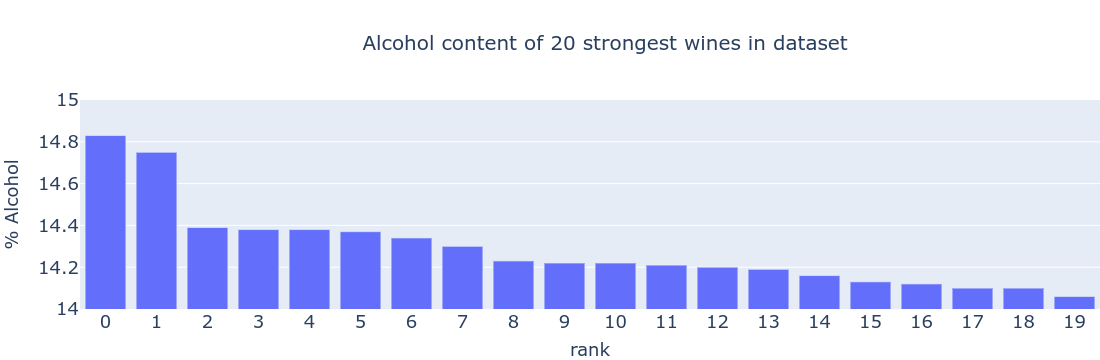

In [8]:
# Create Figure
wine_fig = go.Figure()

# Add wine-data as Bar-chart
_ = wine_fig.add_trace(
    go.Bar(
        y=wine_df.sort_values(by='alcohol', ascending=False).iloc[:20]['alcohol'],
    )
)

# Define layout
wine_layout = go.Layout(
    width=1000, height=350,
    font_size=10,
    title=dict(text='Alcohol content of 20 strongest wines in dataset', x=0.55,
               font_size=20),
    
    margin=dict(l=80, r=0, b=0, t=100,),
    
    xaxis=dict(
        title='rank', title_font=dict(size=18,),
        tickmode='linear', tick0=2, dtick=1,
        tickfont=dict(size=18,),
    ),
    
    yaxis=dict(
        title=dict(text='% Alcohol', font_size=18,),
        range=[14, 15],
        tickfont=dict(size=18,),
    )
)

# Update layout
_ = wine_fig.update_layout(wine_layout)

# Show figure
_ = wine_fig.show()

<hr style="border:2px solid black"> </hr>
<h2> 2.6 Simple heatmap with <code>go.Heatmap()</code> </h2>

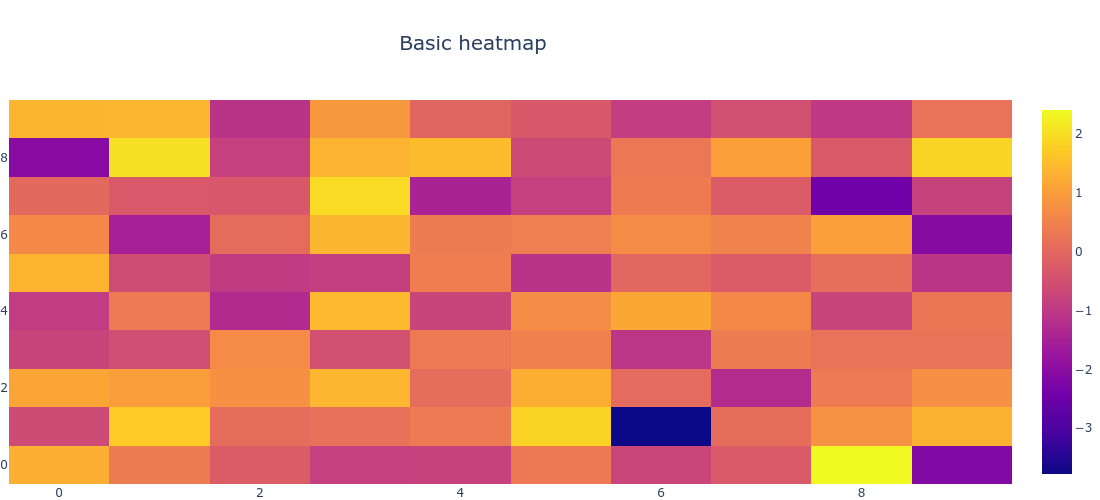

In [9]:
# Let's create some random data
heat_data = np.random.randn(10, 10)

# Create figure
heat_fig = go.Figure()

# Add heatmap-trace
_ = heat_fig.add_trace(go.Heatmap(z=heat_data,),)

# Define layout
heat_layout = go.Layout(
    width=500, height=500,
    title=dict(text='Basic heatmap', x=0.43, font_size=20,),
    margin=dict(l=0, r=0, b=0, t=100,),
)

# Update layout
_ = heat_fig.update_layout(heat_layout)

# Show figure
_ = heat_fig.show()

<hr style="border:2px solid black"> </hr>
<h1> 3. Some exemplary use cases </h1>

<h2> 3.1 Plotting of DFT energies </h2>

In [10]:
# Let's create some random sample data
metals = ["Ni", "Pd", "Pt"]
energy_data = np.random.uniform(low=0, high=3, size=(10,3))

# Let's set our "ground states"
energy_data[0,:] = 0

# Let's introduce some outliers
energy_data[-1, 0] = energy_data[-1, 0]+6
energy_data[-1, 1] = energy_data[-1, 1]+4
energy_data[-1, 2] = energy_data[-1, 2]-4

# DataFrame creation
energy_df = pd.DataFrame(data=energy_data, columns=metals)

energy_df.head(10)

Ni        Pd        Pt
0  0.000000  0.000000  0.000000
1  2.124594  1.892023  0.235902
2  2.210546  1.385478  2.460149
3  1.220219  2.808253  0.335677
4  1.532051  1.610436  0.109533
5  1.174360  1.752837  0.021228
6  2.539065  0.707453  0.143409
7  1.735770  0.265242  0.096864
8  2.853238  2.200631  2.822897
9  7.328552  5.292421 -2.402321

In [11]:
# Create custom hovertexts
hover_texts = ["ground state"]+["all good"]*8+["messed up POTCAR"] + \
              ["ground state"]+["all good"]*8+["not converged"] + \
              ["ground state"]+["all good"]*8+["wrong k-point sampling"]

hover_texts = [hover_text+'<br>Directory {}'.format(i) for i, hover_text in enumerate(hover_texts)]
hover_texts = np.reshape(hover_texts, (3, 10))

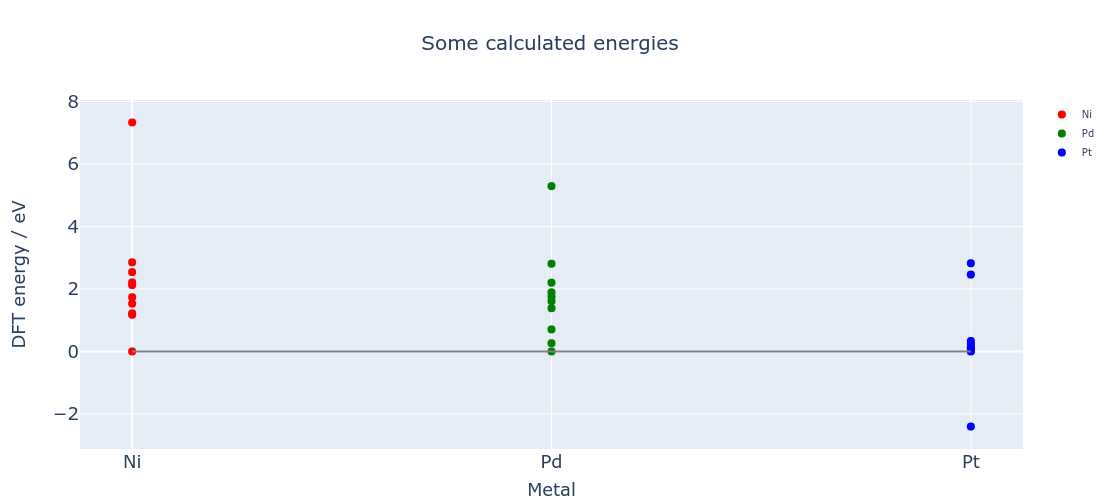

In [12]:
# Create Figure
energy_fig = go.Figure()

metal_colors = ["red", "green", "blue"]

# Add one trace per metal for more control
for imetal, metal in enumerate(metals):
    _ = energy_fig.add_trace(
            go.Scatter(
                x=[imetal]*len(energy_df[metal]),
                y=energy_df[metal],
                mode='markers', marker_size=8, name=metal,
                
                marker_color=metal_colors[imetal],
                hoverinfo='x+y+text',
                text=hover_texts[imetal],
            ),
    )
#   print(hover_texts[imetal])

# Zero-reference line
_ = energy_fig.add_trace(
        go.Scatter(
            x = [0, 2],
            y = [0, 0],
            mode='lines', line_color='grey', line_width=2,
            showlegend=False, hoverinfo='skip',
        ),
)

# Update figure layout
energy_layout = go.Layout(
    
    width=700, height=500,
    font_size=10,
    title=dict(text='Some calculated energies', x=0.5, font_size=20),
    
    margin=dict(l=80, r=0, b=0, t=100,),
    
    xaxis=dict(
        title='Metal', title_font=dict(size=18,),
        tickmode = 'array', tick0 = 1, dtick = 1,
        tickfont=dict(size=18,),
        tickvals=[0, 1, 2],
        ticktext=metals,
    ),
    
    yaxis=dict(
        title=dict(text='DFT energy / eV', font_size=18),
        tickfont=dict(size=18,),
    )
)

_ = energy_fig.update_layout(energy_layout)

# Plot and save figure
_ = energy_fig.show()
_ = plot(energy_fig, filename='./dft_energies.html', auto_open=False)

<hr style="border:2px solid black"> </hr>
<h2> 3.2 Visualization of Molecular Dynamics results </h2>
<!-- <center><img src="md_mos.html" style="width: 1000px" align="center"></center> -->

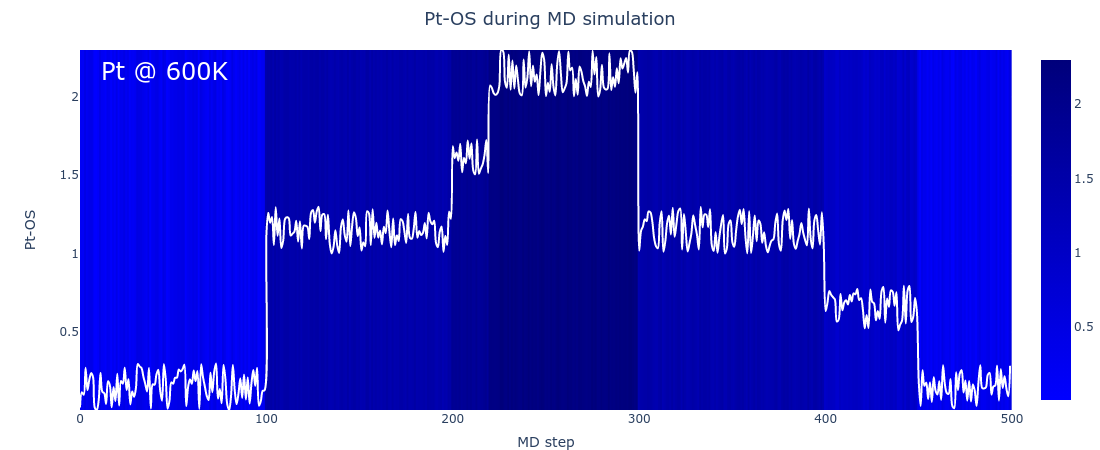

In [13]:
# Let's create some sample MD data
md_mos = np.random.uniform(low=0, high=0.3, size=(500,))
md_mos[100:200] += 1
md_mos[200:220] += 1.5
md_mos[220:300] += 2
md_mos[300:400] += 1
md_mos[400:450] += 0.5

# Scale M-OS into values between 0 and 1 to be used in rgba-color specification
mos_min, mos_max, mos_mean = np.min(md_mos), np.max(md_mos), np.mean(md_mos)
mos_colors = [np.log(mos+1) for mos in md_mos]
mos_colors = [(mos-mos_min)/(mos_max-mos_min) for mos in mos_colors]

# Create figure
md_fig = go.Figure()

# Add one line-trace for each data-point
for imos, mos in enumerate(md_mos):
    
    # Add vertical line for each MD-step
    _ = md_fig.add_trace(go.Scatter(
            x=[imos, imos],
            y=[mos_min, mos_max],
            mode='lines', text=str(mos),
            line=dict(color='rgba({}, {}, {}, {})'.format(0, 0, 255-mos_colors[imos]*255, 1), width=3),
            hoverinfo='x+text', showlegend=False,
            )
    )

# Add overall Pt-OS line
_ = md_fig.add_trace(go.Scatter(
        y=md_mos,
        mode='lines', text=md_mos,
        line=dict(color='white', width=2, shape='spline'),
        hoverinfo='skip', showlegend=False,
        )
    )

# Define custom colorscale legend via heatmap
color_array = np.linspace(min(mos_colors), max(mos_colors), 51)
color_list = ['rgba({}, {}, {}, {})'.format(0, 0, 255-color_val*255, 1) for color_val in color_array]
_ = md_fig.add_trace(go.Heatmap(
        z=[np.linspace(mos_min, mos_max, 51)],
        colorscale=[color for color in color_list],
        )
    )

# Add text annotation
_ = md_fig.add_annotation(
    xanchor="left", yanchor="top",
    x=0.02*len(md_mos), y=0.99*max(md_mos),
    text="Pt @ 600K",
    font=dict(color='white', size=24),
    showarrow=False,
)

# Define layout
md_layout = go.Layout(
    title=dict(text="Pt-OS during MD simulation", font_size=18, x=0.5,),
    width=900, height=450, margin=dict(l=80, r=0, b=0, t=50,),
    autosize=True,
    yaxis=dict(title='Pt-OS', side='left', range=[mos_min, mos_max]),
    xaxis=dict(title='MD step', range=[0, len(md_mos)],),
    hovermode='x unified', hoverlabel={'namelength': -1},
)

# Update layout
_ = md_fig.update_layout(md_layout)

# Show and save figure
_ = md_fig.show()
_ = plot(md_fig, filename='./md_os.html', auto_open=False)

del md_fig

<hr style="border:2px solid black"> </hr>
<h2> 3.3 Applications in statistical learning - PCA and LASSO </h2>

In [14]:
# Let's define some random data
feature_data = np.random.uniform(low=0, high=3, size=(100,8))
feature_names = ['feature {}'.format(i) for i in range(8)]
df = pd.DataFrame(data=feature_data, columns=feature_names)
df.head()

feature 0  feature 1  feature 2  feature 3  feature 4  feature 5  \
0   0.025551   0.536383   1.833197   2.711500   0.763764   0.616525   
1   1.016685   2.324678   1.265831   0.594727   2.444913   1.253060   
2   0.125756   0.909490   1.802324   0.629428   1.137616   1.389111   
3   1.318591   2.434025   0.147400   1.917150   0.056847   2.638240   
4   2.734554   1.867144   1.161907   1.197751   0.285284   0.992150   

   feature 6  feature 7  
0   1.127468   0.140210  
1   1.210742   0.871825  
2   1.897161   2.104050  
3   2.160139   1.837766  
4   2.783480   0.120561

In [15]:
# Data standardization
scaler = StandardScaler().fit(feature_data)
x_scaled = scaler.transform(feature_data)

# Run PCA
n_components=4
pca = PCA(n_components=n_components)
x_transformed = pca.fit_transform(x_scaled)

pca_headers = ['PC {}'.format(pci) for pci in range(x_transformed.shape[1])]

# Define df with feature-weights of each PC
weight_df = pd.DataFrame(
    data=pca.components_.transpose(),
    columns=pca_headers,
).abs()

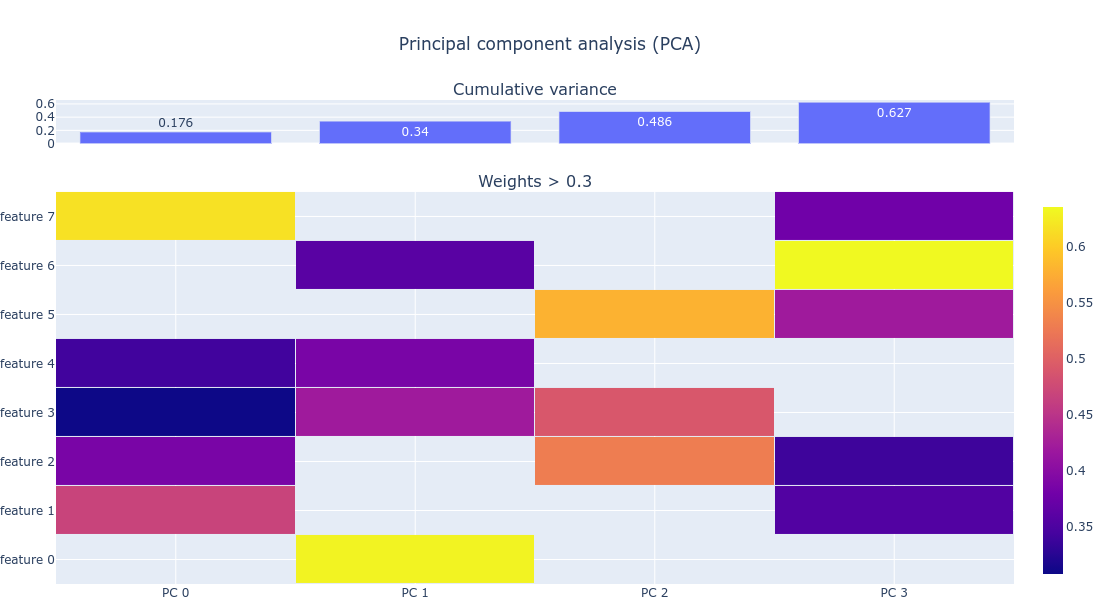

In [16]:
# Define figure with 2 vertically stacked subplots
pca_fig = make_subplots(rows=2, subplot_titles=["Cumulative variance", "Weights > 0.3"],
                        vertical_spacing=0.1, row_heights=[0.1, 0.9], shared_xaxes=True,)

# Add bar chart of cumulative variance to first subplot
cumulative_variance = list(np.cumsum(pca.explained_variance_ratio_))
_ = pca_fig.add_trace(go.Bar(
        x=['PC '+ str(i) for i in range(n_components)],
        y=cumulative_variance,
        showlegend=False, textposition='auto',
        text=[round(y, 3) for y in cumulative_variance],
        hoverinfo='x+y',
    ), 
    row=1, col=1,
)

# Add weight heatmap to second subplot
_ = pca_fig.add_trace(go.Heatmap(
        x=['PC '+ str(i) for i in range(n_components)],
        y=feature_names,
        z=weight_df[weight_df > 0.3].values,
        xgap=1, ygap=1, colorbar=dict(thickness=20, ticklen=3, len=0.8, y=0.4),
        hoverinfo='x+y+z',
    ),
    row=2, col=1,
)

# Define global layout
pca_layout = go.Layout(
    title=dict(text='Principal component analysis (PCA)', x=0.5),
    width=800, height=600, font=dict(size=12),
    margin=dict(l=0, r=0, b=0, t=100,),
)

# Update global layout
_ = pca_fig.update_layout(pca_layout)

# Show figure
_ = pca_fig.show()
_ = plot(pca_fig, filename='./pca.html', auto_open=False)

In [17]:
# Define data
lasso_target = df["feature 0"]  - \
             2*df["feature 1"]  + \
     3*np.sqrt(df["feature 2"]) - \
     .1*np.exp(df["feature 3"])

x = feature_data
y = lasso_target

# Data splitting and standardization
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=False)
train_scaler = StandardScaler().fit(x_train)
x_train_scaled = train_scaler.transform(x_train)
x_test_scaled  = train_scaler.transform(x_test)

# Vary alpha-parameter of Lasso-model
alphas = np.linspace(start=float('1e-5'), stop=float('2'), num=1000)
coefs = []
for alpha in alphas:
    model = Lasso(alpha)
    _ = model.fit(x_train_scaled, y_train)
    coefs.append(model.coef_)

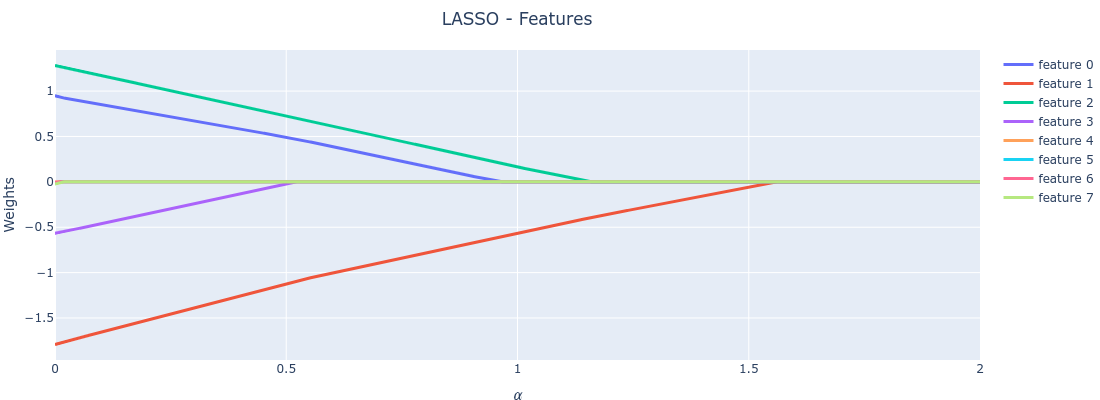

In [18]:
# Create figure
lasso_feat_fig = go.Figure()

# Plot course of Features
for ifeat, feat in enumerate(feature_names):
    _ = lasso_feat_fig.add_trace(go.Scatter(
        x=alphas,
        y=[coef[ifeat] for coef in coefs],
        mode='lines', line=dict(width=3), showlegend=True, name=feat,
    ),
)

lasso_feat_layout = go.Layout(
    width=1000, height=400, font=dict(size=12), margin=dict(l=0, r=0, b=0, t=50,),
    title=dict(text='LASSO - Features', x=0.47,),
    xaxis=dict(title=r'$\alpha$', range=[0, max(alphas)],),
    yaxis=dict(title='Weights',),
    
    hoverlabel = {'namelength': -1}, hovermode='x unified',
)

_ = lasso_feat_fig.update_layout(lasso_feat_layout)

# Save and plot Figure
_ = plot(lasso_feat_fig, filename='./lasso.html', auto_open=False)
_ = lasso_feat_fig.show()

<hr style="border:2px solid black"> </hr>
<h1> 4. Miscellaneous tips and tricks </h1>

<h2> 4.1 Internal workings of the Figure class </h2>

In [19]:
print(type(energy_fig))
print('='*42)
print(energy_fig)

<class 'plotly.graph_objs._figure.Figure'>
Figure({
    'data': [{'hoverinfo': 'x+y+text',
              'marker': {'color': 'red', 'size': 8},
              'mode': 'markers',
              'name': 'Ni',
              'text': array(['ground state<br>Directory 0', 'all good<br>Directory 1',
                             'all good<br>Directory 2', 'all good<br>Directory 3',
                             'all good<br>Directory 4', 'all good<br>Directory 5',
                             'all good<br>Directory 6', 'all good<br>Directory 7',
                             'all good<br>Directory 8', 'messed up POTCAR<br>Directory 9'],
                            dtype='<U38'),
              'type': 'scatter',
              'x': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              'y': array([0.        , 2.12459352, 2.21054615, 1.2202187 , 1.53205085, 1.17436023,
                          2.53906456, 1.73576981, 2.85323766, 7.32855177])},
             {'hoverinfo': 'x+y+text',
              'marker': {'

In [20]:
energy_fig.show("json")

<hr style="border:2px solid black"> </hr>
<h2> 4.2 Saving, exporting and importing of figures </h2>

In [21]:
# Static export requires some dependencies, e.g. psutil, plotly-orca
_ = energy_fig.write_image('./dft_energies.png')
_ = energy_fig.write_image('./dft_energies.svg')
_ = energy_fig.write_json('./dft_energies.json')

# Export as interactive figures in html-format
_ = plot(energy_fig, filename='./dft_energies.html', auto_open=False)
_ = energy_fig.write_html('./dft_energies.html')

# Import of interactive html-figure into jupyter-notebook
del energy_fig
IFrame("./dft_energies.html", width=750, height=550)

<hr style="border:2px solid black"> </hr>
<h2> 4.3 Instant documentation in Error Tracebacks </h2>

In [22]:
error_layout = go.Layout(
    width=400, height=400,
#     abc='abc',
    xaxis=dict(
#         abc='abc',
#          ticks='abc',
    )
)

<hr style="border:2px solid black"> </hr>
<h2> 4.4 Direct plotting from Pandas-DataFrames </h2>

a  b
0  1  3
1  3  2
2  2  1

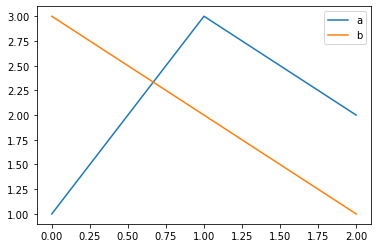

In [23]:
pd.options.plotting.backend = "matplotlib"

df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1]))
df.head()
fig = df.plot()

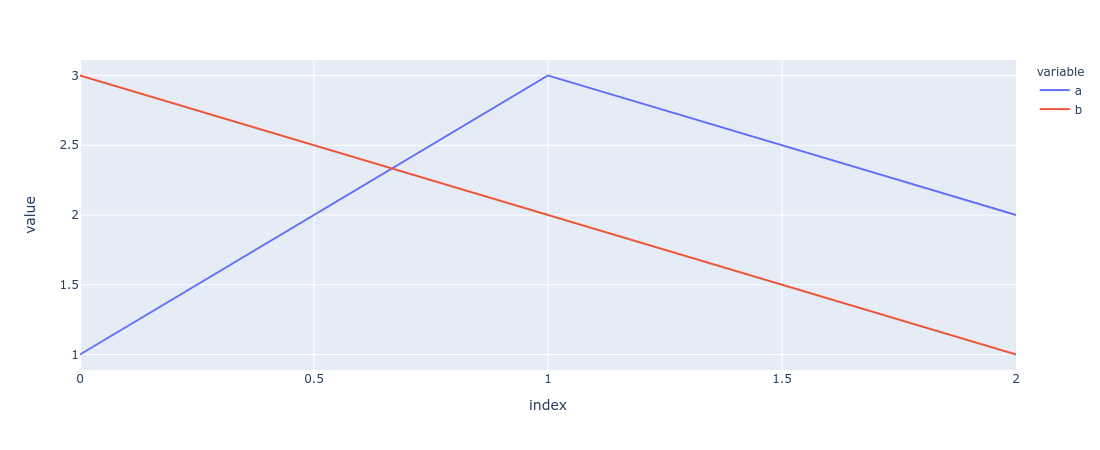

In [24]:
pd.options.plotting.backend = "plotly"
# Can also be done via api provided by third-party module "cufflinks"
fig1 = df.plot()
fig1.show()

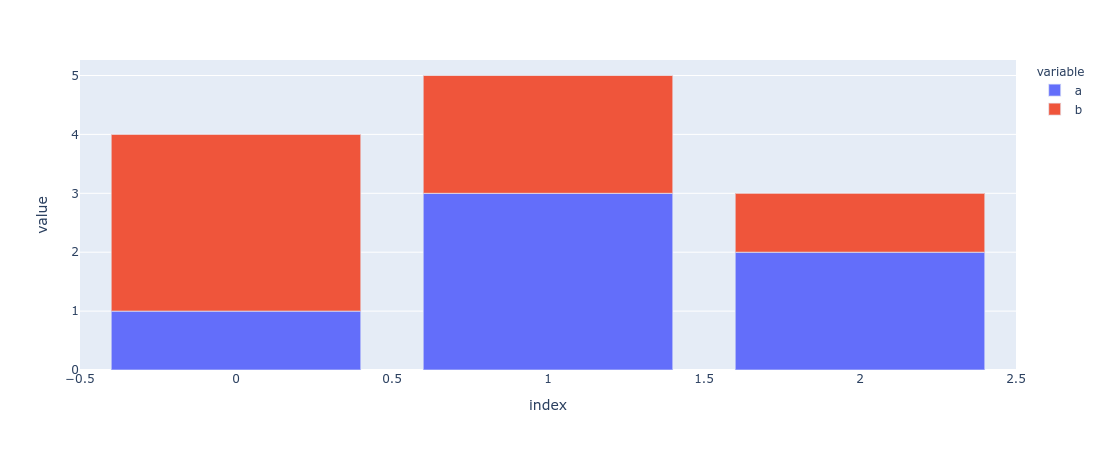

In [25]:
fig2 = df.plot.bar()
fig2.show()

<hr style="border:2px solid black"> </hr>
<h2> 4.5 Further resources </h2> 
<font size="4">
<ul>
    <br> <li> <a href="https://plotly.com/python/"> Types of charts and examples </a> </li>
    <br> <li> <a href="https://plotly.com/python/reference/"> Single-page reference </a> </li>
    <br> <li> <a href="https://www.youtube.com/watch?v=GGL6U0k8WYA"> All chart types in one video </a> </li>
</ul>
</font>